In [2]:
import public_timeseries_testing_util

env = public_timeseries_testing_util.make_env()
iter_test = env.iter_test()

counter = 0
# The API will deliver four dataframes in this specific order:
for (test, test_peptides, test_proteins, sample_submission) in iter_test:
    if counter == 0:
        print(test.head())
        print(test_peptides.head())
        print(test_proteins.head())
        print(sample_submission.head())
        sample_submission['rating'] = 0
    env.predict(sample_submission)
    counter += 1

          visit_id  visit_month  patient_id updrs_test           row_id
group_key                                                              
0           3342_0            0        3342    updrs_1   3342_0_updrs_1
0           3342_0            0        3342    updrs_2   3342_0_updrs_2
0           3342_0            0        3342    updrs_3   3342_0_updrs_3
0           3342_0            0        3342    updrs_4   3342_0_updrs_4
0          50423_0            0       50423    updrs_1  50423_0_updrs_1
          visit_id  visit_month  patient_id UniProt  \
group_key                                             
0          50423_0            0       50423  O00391   
0          50423_0            0       50423  O00391   
0          50423_0            0       50423  O00533   
0          50423_0            0       50423  O00533   
0          50423_0            0       50423  O00533   

                                          Peptide  PeptideAbundance  
group_key                               

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
proteins = pd.read_csv("./train_proteins.csv")
print('proteins shape: ',proteins.shape)
proteins.head()

proteins shape:  (232741, 5)


,visit_id,visit_month,patient_id,UniProt,NPX
0,55_0,0,55,O00391,11254.3
1,55_0,0,55,O00533,732430.0
2,55_0,0,55,O00584,39585.8
3,55_0,0,55,O14498,41526.9
4,55_0,0,55,O14773,31238.0


In [12]:
# 假设您的 DataFrame 叫做 df
unique_proteins = proteins['UniProt'].unique()

# 创建一个空字典来存储每个蛋白质的计数
protein_counts = {}

# 计算每个蛋白质出现的次数
for protein in unique_proteins:
    protein_counts[protein] = proteins[proteins['UniProt'] == protein]['visit_id'].count()

In [13]:
# 创建一个空字典来存储每个病人的数据
patient_data = {}

# 获取独特的病人 ID
unique_patients = proteins['patient_id'].unique()

# 计算每个病人的数据
for patient in unique_patients[0:5]:
    patient_data[patient] = []
    for protein in unique_proteins:
        count = proteins[(proteins['UniProt'] == protein) & (proteins['patient_id'] == patient)]['visit_id'].count()
        patient_data[patient].append(count)

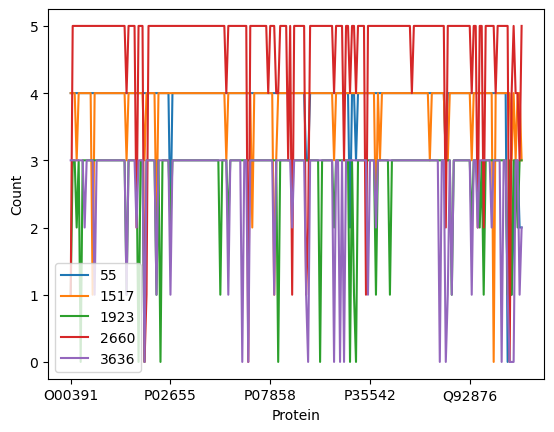

array(['O00391', 'O00533', 'O00584', 'O14498', 'O14773', 'O14791',
       'O15240', 'O15394', 'O43505', 'O60888', 'O75144', 'O75326',
       'O94919', 'P00441', 'P00450', 'P00734', 'P00736', 'P00738',
       'P00746', 'P00747', 'P00748', 'P00751', 'P01008', 'P01009',
       'P01011', 'P01019', 'P01023', 'P01024', 'P01031', 'P01033',
       'P01034', 'P01042', 'P01344', 'P01591', 'P01608', 'P01621',
       'P01717', 'P01780', 'P01833', 'P01834', 'P01857', 'P01859',
       'P01860', 'P01861', 'P01876', 'P01877', 'P02452', 'P02647',
       'P02649', 'P02652', 'P02655', 'P02656', 'P02671', 'P02675',
       'P02679', 'P02747', 'P02748', 'P02749', 'P02750', 'P02751',
       'P02753', 'P02760', 'P02763', 'P02765', 'P02766', 'P02768',
       'P02774', 'P02787', 'P02790', 'P04004', 'P04075', 'P04156',
       'P04180', 'P04196', 'P04207', 'P04211', 'P04216', 'P04217',
       'P04275', 'P04406', 'P04433', 'P05060', 'P05067', 'P05090',
       'P05155', 'P05156', 'P05408', 'P05452', 'P05546', 'P063

In [61]:
# 将字典转换为 DataFrame
patient_df = pd.DataFrame.from_dict(patient_data).set_index(unique_proteins)

# 画出曲线图
patient_df.plot()
plt.xlabel('Protein')
plt.ylabel('Count')
plt.show()
unique_proteins

In [60]:
patient_proteins = proteins[proteins['patient_id'] == 55]
protein_counts = patient_proteins.groupby(['visit_id', 'UniProt']).size().reset_index(name='count')

# 使用 pivot_table 函数将数据透视为一个以 visit_id 为索引，以 UniProt 为列的 DataFrame
protein_pivot = protein_counts.pivot_table(values='count', index='visit_id', columns='UniProt', aggfunc=sum, fill_value=0)

# 显示透视结果
protein_pivot

UniProt,O00391,O00533,O00584,O14498,O14773,O14791,O15240,O15394,O43505,O60888,...,Q9HDC9,Q9NQ79,Q9NYU2,Q9UBR2,Q9UBX5,Q9UHG2,Q9UKV8,Q9UNU6,Q9Y646,Q9Y6R7
visit_id,,,,,,,,,,,,,,,,,,,,,
55_0,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,0,1,1,1
55_12,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
55_36,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
55_6,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,0,1,1,1


In [10]:
# 创建一个空字典来存储每个病人的数据
patient_data = {}

# 获取独特的病人 ID
unique_patients = proteins['patient_id'].unique()

# 计算每个病人的数据
for patient in unique_patients:
    patient_data[patient] = []
    for protein in unique_proteins:
        count = proteins[(proteins['UniProt'] == protein) & (proteins['patient_id'] == patient)]['visit_id'].count()
        patient_data[patient].append(count)

KeyboardInterrupt: 